<a href="https://colab.research.google.com/github/DoyulPark/pdm08/blob/master/py-tensorflow/tf2_5_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
64*7*7

3136

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


## **데이터 로딩, 정규화**

In [4]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [5]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- one random number
- 10 representative numbers

3914


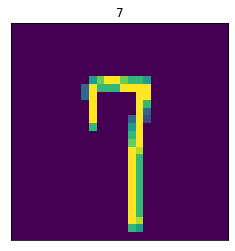

In [6]:
# Code here!

# display one random image from the training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


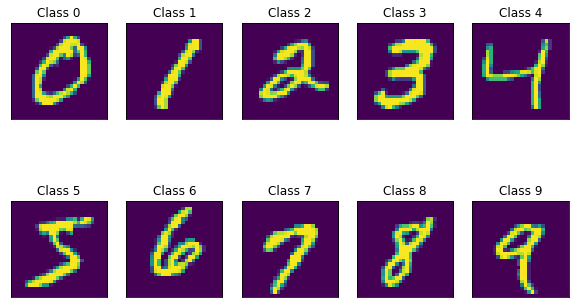

In [9]:
#10 representative numbers
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import Conv2D, MaxPool2D

In [10]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout #kerasys.layers을 사용하기 싫으면 명령어를 써주면된다

##**CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [19]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'), #kernel=filter, padding=그림의 오른쪽 왼쪽 아래를 0으로채운다,28x28의 출력결과도 28*28
    MaxPool2D(pool_size=(2,2), strides=(2,2)),  # convorsion에서 겹치는거 없이 다시 2x2로 이동
    Flatten(),  # 추가한부분(2차원을 1차원으로 바꿔주어야한다)
    Dense(128, activation='relu'),  
    Dropout(0.25),  #Dropout=kerasys.layers.Dropout
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam', #학습알고리즘
              loss='categorical_crossentropy', #클래스가 10개 이상인 경우 categoricla_crossentropy 사용
              metrics=['accuracy']) 

In [21]:
c1f2.summary()  #flatten은 parameter가 없다(8만개로 숫자상승)->1차원이기때문

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
________________________________________________

In [22]:
32*14*14, 32*14*14*128 + 128

(6272, 802944)

In [23]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32) #효율적인 학습능력, accuracy상승

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1768 - accuracy: 0.9468
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0661 - accuracy: 0.9802
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0454 - accuracy: 0.9858
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9932
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9934
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0156 - accuracy: 0.9946
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.011

In [24]:
c1f2.evaluate(X_test, y_test, batch_size =32) #train데이터로 학습시킴

313/313 [==============================] - 1s 2ms/step - loss: 0.0637 - accuracy: 0.9883


[0.06367097795009613, 0.9883000254631042]

## **CNN1 + FCN3**

In [25]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  # 추가한부분
    Dense(256, activation='relu'),  #추가한부분(2배로 늘림)
    Dropout(0.25),                #추가한 부분
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [26]:
c1f3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [27]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1819 - accuracy: 0.9450
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0639 - accuracy: 0.9802
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0440 - accuracy: 0.9861
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9892
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9917
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9938
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9943
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148 - accuracy: 0.9954
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0139 - accuracy: 0.9962
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

In [28]:
c1f3.evaluate(X_test, y_test, batch_size= 32) #검증과정

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9886


[0.06717720627784729, 0.9886000156402588]

## **CNN2 + FCN2**

In [30]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),#추가한부분(input부분은 지워준다),뉴런의 개수가 64개
    MaxPool2D(pool_size=(2,2), strides=(2,2)),  #추가한부분
    Flatten(),  # 추가한부분
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [32]:
c2f2.summary()  #좋은 딥러닝 모델은 학습시킬 파라미터가 적으면서 검증정확도가 높은것

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [33]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1464 - accuracy: 0.9551
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0349 - accuracy: 0.9896
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0147 - accuracy: 0.9950
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0138 - accuracy: 0.9955
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9965
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [34]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9917


[0.04300049692392349, 0.9916999936103821]

## **CNN2 + FCN3**

In [35]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),  # 추가한부분
    Dense(256, activation='relu'),  #숫자2배로
    Dropout(0.25), 
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [36]:
c2f3.summary() #숫자2배로 늘림 파라미터 2배

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               803072    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)              

In [37]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1611 - accuracy: 0.9515
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0538 - accuracy: 0.9844
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0406 - accuracy: 0.9876
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9904
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - accuracy: 0.9937
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0140 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

In [39]:
c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9914


[0.043826643377542496, 0.9914000034332275]

# **[DIY] Hidden layer에 따른 정확도**

In [41]:
c1f2score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3score = c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9914


In [42]:
#select accuracies
accuracy = [c1f2score[1], c1f3score[1], c2f2score[1], c2f3score[1]] #list로 정리
accuracy

[0.9883000254631042,
 0.9886000156402588,
 0.9916999936103821,
 0.9914000034332275]

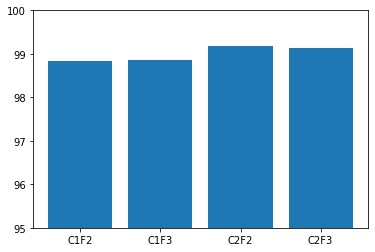

In [45]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))#percent로 바꿧기에 ~100%
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [46]:
c2f3.save('cnn_best.hdf5')

In [49]:
from keras.models import load_model

model = load_model('cnn_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9914


[0.043826643377542496, 0.9914000034332275]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [48]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test)) # 검증정확도 (학습시키는 중간중간)를 확인해준다

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0345 - val_accuracy: 0.9921
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0466 - val_accuracy: 0.9920
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0374 - val_accuracy: 0.9917
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0433 - val_accuracy: 0.9926
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0431 - val_accuracy: 0.9922
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0451 - val_accuracy: 0.9917
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0416 - val_accuracy:

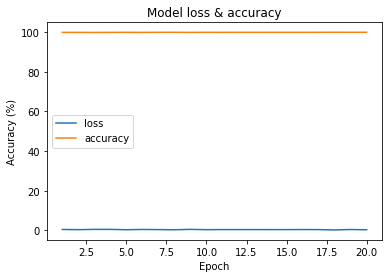

In [50]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']] #100을 곱해서 퍼센트로 바꿈
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [51]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

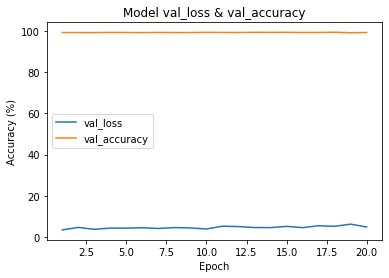

In [52]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')  #변화가 조금더 크다

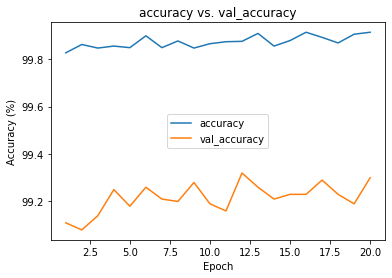

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')  #training 보다 validation에 대한 정확도가 조금더 낮게 나오는게 학습이 잘된 모델 

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [53]:
# Code here!

hist2 = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test)) 

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0479 - val_accuracy: 0.9918
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0504 - val_accuracy: 0.9912
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0366 - val_accuracy: 0.9917
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0463 - val_accuracy: 0.9921
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0428 - val_accuracy: 0.9922
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0503 - val_accuracy: 0.9905
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0675 - val_accuracy:

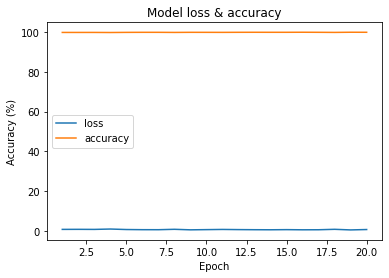

In [54]:
# Plot loass and accuracy
# Plot training & validation accuracy values

epochs = 20
loss_list = [100 * i for i in hist2.history['loss']]
acc_list = [100 * i for i in hist2.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [55]:
vloss_list = [100 * i for i in hist2.history['val_loss']]
vacc_list = [100 * i for i in hist2.history['val_accuracy']]

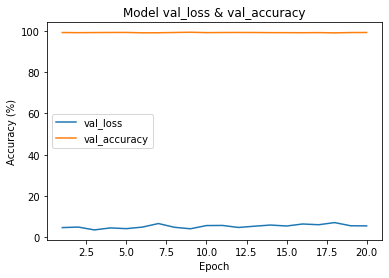

In [56]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

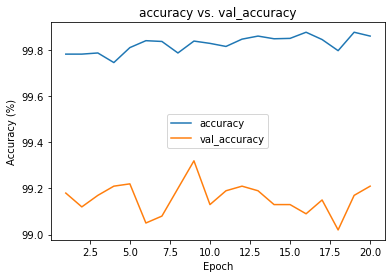

In [57]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')